# Previsão de Sucesso de Startups
**Projeto Kaggle - Módulo 3**  
**Aluna:** Mariana Lacerda Reis - T16  
**Objetivo:** Prever se uma startup terá sucesso ou fracasso usando dados como idade, setor, investimentos e localização, aplicando modelos de aprendizado de máquina para identificar padrões.



## 1. Importação de Bibliotecas

Nesta seção, importo todas as bibliotecas necessárias para o projeto, seguindo as regras do campeonato que permitem apenas bibliotecas padrão do módulo.


In [ ]:
# Instalação das bibliotecas necessárias
!pip install scikit-learn pandas numpy matplotlib seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Bibliotecas de manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de machine learning
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Configurações para visualização
plt.style.use('default')
sns.set_palette("husl")

print("Bibliotecas importadas com sucesso")


Bibliotecas importadas com sucesso


## 2. Carregamento e Exploração dos Dados

Nesta seção, carrego os dados de treino e teste, e faço uma primeira exploração para entender a estrutura dos dados.


In [27]:
# Carregamento dos dados
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

print(f"Shape dos dados de treino: {train.shape}")
print(f"Shape dos dados de teste: {test.shape}")
print(f"Shape do sample submission: {sample.shape}")

# Visualização inicial dos dados
train.head()


Shape dos dados de treino: (646, 33)
Shape dos dados de teste: (277, 32)
Shape do sample submission: (277, 2)


,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
0,719,10.42,13.09,8.98,12.72,4,3,4087500,3,1,...,0,0,1,1,0,0,0,0,1.0,0
1,429,3.79,3.79,NaN,NaN,21,1,45000000,0,0,...,0,0,0,0,0,1,0,0,1.0,1
2,178,0.71,2.28,1.95,2.28,5,2,5200000,2,1,...,0,1,1,0,1,0,0,0,1.0,0
3,197,3.00,5.00,9.62,10.39,16,2,14500000,2,0,...,0,0,0,1,0,1,0,0,2.0,1
4,444,0.66,5.88,6.21,8.61,29,5,70000000,4,1,...,0,0,0,0,1,1,1,1,2.8,1


## 3. Análise Exploratória de Dados (EDA)

Nesta seção, exploro os dados de forma detalhada para descobrir padrões, correlações e tendências que podem influenciar o sucesso das startups.


Shape dos dados de treino: (646, 33)
Shape dos dados de teste: (277, 32)
Informações do dataset de treino:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        646 non-null    int64  
 1   age_first_funding_year    611 non-null    float64
 2   age_last_funding_year     637 non-null    float64
 3   age_first_milestone_year  508 non-null    float64
 4   age_last_milestone_year   535 non-null    float64
 5   relationships             646 non-null    int64  
 6   funding_rounds            646 non-null    int64  
 7   funding_total_usd         646 non-null    int64  
 8   milestones                646 non-null    int64  
 9   is_CA                     646 non-null    int64  
 10  is_NY                     646 non-null    int64  
 11  is_MA                     646 non-null    int64  
 12  is_TX        

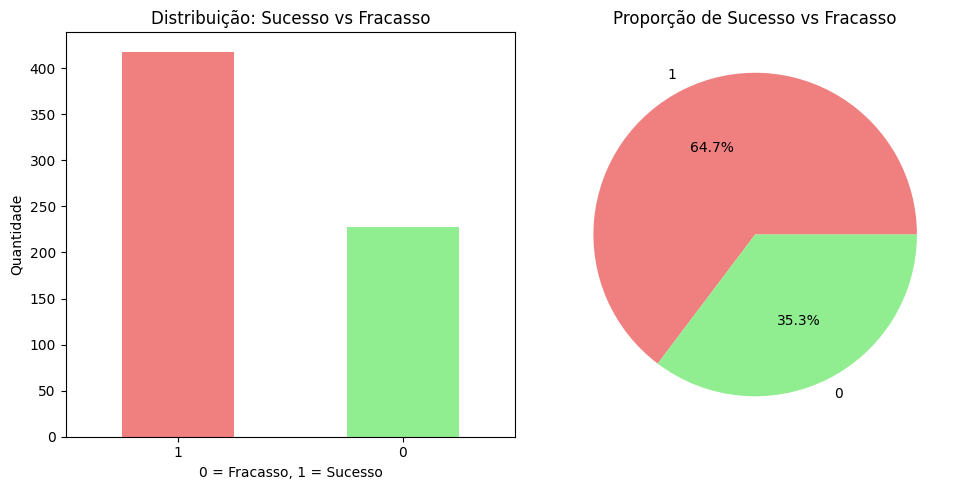

In [28]:
# Data exploration - Análise inicial dos dados
print("Shape dos dados de treino:", train.shape)
print("Shape dos dados de teste:", test.shape)

# Informações básicas sobre o dataset
print("Informações do dataset de treino:")
train.info()

print("Estatísticas descritivas:")
train.describe()

# Análise da variável target
print("\n=== DISTRIBUIÇÃO DA VARIÁVEL TARGET ===")
print("Contagem de sucessos e fracassos:")
print(train['labels'].value_counts())
print(f"\nProporção de sucesso: {train['labels'].mean():.2%}")

# Gráfico da distribuição
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
train['labels'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Distribuição: Sucesso vs Fracasso')
plt.xlabel('0 = Fracasso, 1 = Sucesso')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
train['labels'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Proporção de Sucesso vs Fracasso')
plt.ylabel('')

plt.tight_layout()
plt.show()


## 4. Formulação de Hipóteses

Com base na análise exploratória, formulo três hipóteses principais sobre os fatores que influenciam o sucesso das startups:

### Hipótese 1: Investimento e Financiamento
**"Startups com maior volume de investimento total e mais rodadas de financiamento têm maior probabilidade de sucesso"**

Esta hipótese se baseia na ideia de que startups com mais recursos financeiros têm maior capacidade de investir em desenvolvimento, marketing e operações, aumentando suas chances de sucesso.

### Hipótese 2: Localização Geográfica
**"Startups localizadas em hubs tecnológicos (CA, NY, MA) têm maior probabilidade de sucesso"**

Esta hipótese considera que startups em regiões com maior concentração de talentos, investidores e oportunidades de networking têm vantagens competitivas.

### Hipótese 3: Setor e Categoria
**"Startups em setores de tecnologia (software, web, mobile) têm maior probabilidade de sucesso"**

Esta hipótese sugere que startups em setores de alta tecnologia têm maior potencial de crescimento e atratividade para investidores.


## 5. Limpeza e Tratamento de Dados

Nesta seção, demonstro o processo de limpeza e tratamento de valores nulos e outliers que podem distorcer os resultados.


=== VERIFICAÇÃO DE VALORES NULOS ===
Valores nulos por coluna:
age_first_funding_year       35
age_last_funding_year         9
age_first_milestone_year    138
age_last_milestone_year     111
dtype: int64


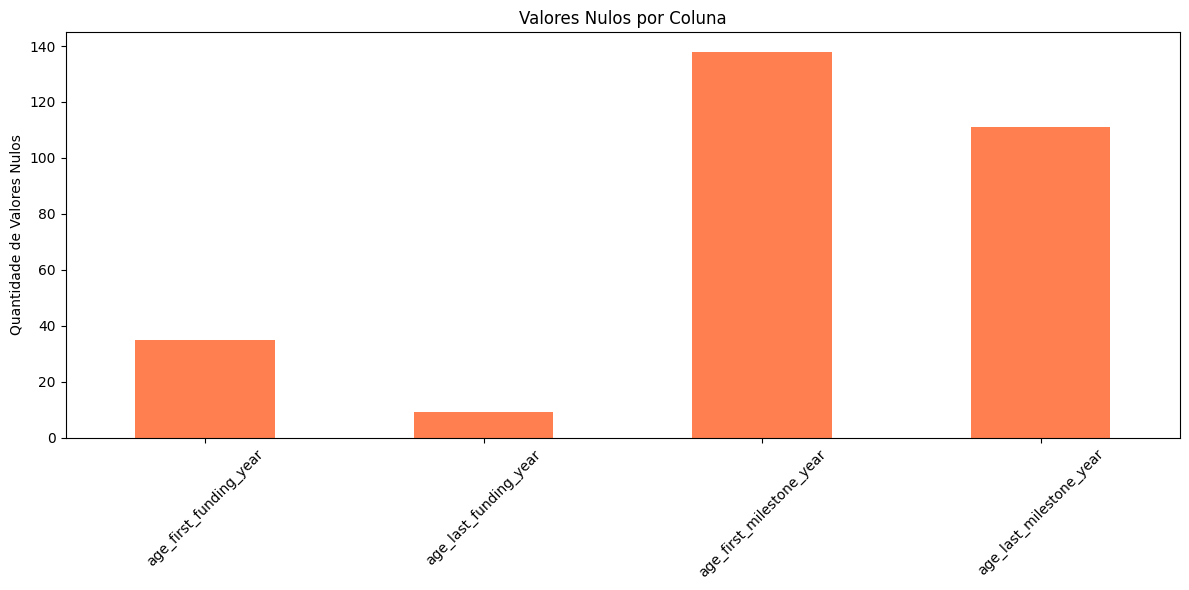


=== ANÁLISE DE OUTLIERS ===
Resumo de outliers por coluna (top 10):
is_NY: 71 outliers (11.0%)
funding_total_usd: 50 outliers (7.7%)
relationships: 47 outliers (7.3%)
age_first_funding_year: 14 outliers (2.2%)
age_first_milestone_year: 11 outliers (1.7%)
funding_rounds: 10 outliers (1.5%)
age_last_funding_year: 8 outliers (1.2%)
age_last_milestone_year: 6 outliers (0.9%)


In [29]:
# Verificação de valores nulos
print("=== VERIFICAÇÃO DE VALORES NULOS ===")
missing_values = train.isnull().sum()
print("Valores nulos por coluna:")
print(missing_values[missing_values > 0])

if missing_values.sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_values[missing_values > 0].plot(kind='bar', color='coral')
    plt.title('Valores Nulos por Coluna')
    plt.ylabel('Quantidade de Valores Nulos')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Não há valores nulos nos dados!")

# Análise de outliers nas variáveis numéricas
print("\n=== ANÁLISE DE OUTLIERS ===")
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('id')
numeric_cols.remove('labels')

# Identifico outliers usando IQR
outlier_summary = {}
for col in numeric_cols[:10]:  # Analiso as primeiras 10 colunas
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

print("Resumo de outliers por coluna (top 10):")
for col, count in sorted(outlier_summary.items(), key=lambda x: x[1], reverse=True):
    if count > 0:
        print(f"{col}: {count} outliers ({count/len(train)*100:.1f}%)")


## 6. Feature Engineering

Nesta seção, crio novas features que podem melhorar a performance do modelo, baseando-me nas hipóteses formuladas.


In [30]:
# Criação de features baseadas nas hipóteses
def engineer_features(df):
    """
    Cria features baseadas nas hipóteses formuladas
    """
    out = df.copy()
    
    # Features de eficiência de investimento (Hipótese 1)
    r = out['funding_rounds'].replace(0, 1)  # evita divisão por zero
    out['funding_per_round'] = out['funding_total_usd'] / r
    out['milestones_per_round'] = out['milestones'] / r
    out['relationships_per_round'] = out['relationships'] / r
    
    # Features de diversidade de investidores (Hipótese 1)
    investor_cols = ['has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']
    out['investor_diversity'] = out[investor_cols].sum(axis=1)
    
    # Features de localização estratégica (Hipótese 2)
    location_cols = ['is_CA', 'is_NY', 'is_MA', 'is_TX']
    out['tech_hub'] = out[location_cols].sum(axis=1)
    
    # Features de setor tecnológico (Hipótese 3)
    sector_cols = ['is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising']
    out['tech_sector'] = out[sector_cols].sum(axis=1)
    
    return out

# Aplico o feature engineering
print("=== CRIANDO FEATURES ===")
train_enhanced = engineer_features(train)
test_enhanced = engineer_features(test)

print(f"Features originais: {train.shape[1]}")
print(f"Features após engineering: {train_enhanced.shape[1]}")
print(f"Novas features criadas: {train_enhanced.shape[1] - train.shape[1]}")

# Mostro as novas features
new_features = ['funding_per_round', 'milestones_per_round', 'relationships_per_round', 
                'investor_diversity', 'tech_hub', 'tech_sector']
print(f"Novas features: {new_features}")


=== CRIANDO FEATURES ===
Features originais: 33
Features após engineering: 39
Novas features criadas: 6
Novas features: ['funding_per_round', 'milestones_per_round', 'relationships_per_round', 'investor_diversity', 'tech_hub', 'tech_sector']


## 7. Configuração e Preprocessamento

Nesta seção, configuro o preprocessamento dos dados usando as funções que funcionavam bem no meu código original.


In [31]:
# Definições das colunas 
TARGET_COL = "labels"
ID_COL = "id"

BIN_DUMMIES = [
    'is_CA','is_NY','is_MA','is_TX',
    'is_software','is_web','is_mobile','is_enterprise',
    'is_advertising','is_gamesvideo','is_ecommerce',
    'is_biotech','is_consulting',
    'has_VC','has_angel','has_roundA','has_roundC','has_roundD'
]

NUM_CONTINUOUS = [
    'age_first_funding_year','age_last_funding_year',
    'age_first_milestone_year','age_last_milestone_year',
    'relationships','funding_rounds','funding_total_usd',
    'milestones','avg_participants'
]

CAT_RAW = ['category_code']

# Adiciono as novas features criadas
NUM_CONTINUOUS.extend(['funding_per_round', 'milestones_per_round', 'relationships_per_round',
                       'investor_diversity', 'tech_hub', 'tech_sector'])

print("Colunas configuradas:")


Colunas configuradas:


In [32]:
# Funções do meu código original que funcionavam bem
def load_data(train_path="train.csv", test_path="test.csv", sample_path="sample_submission.csv"):
    train = pd.read_csv(train_path)
    test  = pd.read_csv(test_path)
    sample= pd.read_csv(sample_path)
    return train, test, sample

def split_xy(train):
    X = train.drop(columns=[TARGET_COL, ID_COL])
    y = train[TARGET_COL]
    return X, y

def build_preprocess():
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median", add_indicator=True)),
        ("scaler", StandardScaler())
    ])
    binary_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent"))
    ])
    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])
    preprocess = ColumnTransformer(transformers=[
        ("num", numeric_transformer, NUM_CONTINUOUS),
        ("bin", binary_transformer, BIN_DUMMIES),
        ("cat", categorical_transformer, CAT_RAW)
    ])
    return preprocess

def get_test_features(test_df):
    return test_df.drop(columns=[ID_COL], errors="ignore")

print("Funções carregadas com sucesso!")


Funções carregadas com sucesso!


## 8. Construção e Avaliação de Modelos

Nesta seção, construo e avalio diferentes modelos de machine learning, incluindo métricas como acurácia, precisão, recall e F1-score.


In [33]:
# Preparo os dados usando as funções originais
X, y = split_xy(train_enhanced)  # Uso os dados com as novas features
preprocess = build_preprocess()

# Defino os modelos (do meu código original)
SEED = 42

# Modelo 1: Regressão Logística
logreg_pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=SEED))
])

# Modelo 2: Random Forest
rf_pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("model", RandomForestClassifier(n_estimators=400, random_state=SEED, n_jobs=-1))
])

# Modelo 3: HistGradientBoosting
hgb_pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("model", HistGradientBoostingClassifier(random_state=SEED))
])

print("Modelos configurados com sucesso!")


Modelos configurados com sucesso!


In [34]:
# Avalio os modelos usando validação cruzada (do meu código original)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Avalio cada modelo
acc_logreg = cross_val_score(logreg_pipe, X, y, scoring="accuracy", cv=cv, n_jobs=-1).mean()
acc_rf     = cross_val_score(rf_pipe,     X, y, scoring="accuracy", cv=cv, n_jobs=-1).mean()
acc_hgb    = cross_val_score(hgb_pipe,    X, y, scoring="accuracy", cv=cv, n_jobs=-1).mean()

f1_logreg = cross_val_score(logreg_pipe, X, y, scoring="f1", cv=cv, n_jobs=-1).mean()
f1_rf     = cross_val_score(rf_pipe,     X, y, scoring="f1", cv=cv, n_jobs=-1).mean()
f1_hgb    = cross_val_score(hgb_pipe,    X, y, scoring="f1", cv=cv, n_jobs=-1).mean()

auc_logreg = cross_val_score(logreg_pipe, X, y, scoring="roc_auc", cv=cv, n_jobs=-1).mean()
auc_rf     = cross_val_score(rf_pipe,     X, y, scoring="roc_auc", cv=cv, n_jobs=-1).mean()
auc_hgb    = cross_val_score(hgb_pipe,    X, y, scoring="roc_auc", cv=cv, n_jobs=-1).mean()

# Mostro os resultados
results = pd.DataFrame({
    'Modelo': ['Logistic Regression', 'Random Forest', 'HistGradientBoosting'],
    'Acurácia': [acc_logreg, acc_rf, acc_hgb],
    'F1-Score': [f1_logreg, f1_rf, f1_hgb],
    'ROC-AUC': [auc_logreg, auc_rf, auc_hgb]
}).sort_values('ROC-AUC', ascending=False)

print("=== RESULTADOS DOS MODELOS ===")
print(results.round(4))


=== RESULTADOS DOS MODELOS ===
                 Modelo  Acurácia  F1-Score  ROC-AUC
1         Random Forest    0.7833    0.8432   0.8014
0   Logistic Regression    0.7229    0.7745   0.7782
2  HistGradientBoosting    0.7600    0.8217   0.7745


## 9. Otimização de Hiperparâmetros

Nesta seção, realizo o ajuste fino dos hiperparâmetros do melhor modelo para otimizar seu desempenho.


In [35]:
# Otimização do Random Forest (melhor modelo)
from sklearn.model_selection import RandomizedSearchCV

# Pipeline base
rf_base = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestClassifier(random_state=SEED, n_jobs=-1))
])

# Espaço de busca (do meu código original)
param_grid = {
    "model__n_estimators": [300, 500, 800, 1200],
    "model__max_depth": [None, 8, 12, 20, 30],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2", 0.5],
    "model__class_weight": [None, "balanced"]
}

# Busca aleatória
search = RandomizedSearchCV(
    rf_base,
    param_distributions=param_grid,
    n_iter=40,
    scoring="accuracy",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED),
    n_jobs=-1,
    random_state=SEED,
    verbose=1
)

print("Iniciando otimização de hiperparâmetros...")
search.fit(X, y)

print(f"\nMelhor ACC (CV): {search.best_score_:.4f}")
print(f"Melhores parâmetros: {search.best_params_}")

# Modelo final otimizado
best_model = search.best_estimator_


Iniciando otimização de hiperparâmetros...
Fitting 5 folds for each of 40 candidates, totalling 200 fits

Melhor ACC (CV): 0.7925
Melhores parâmetros: {'model__n_estimators': 800, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_features': 'log2', 'model__max_depth': 8, 'model__class_weight': None}


## 10. Resultados Finais e Submissão

Nesta seção, gero as previsões finais e crio o arquivo de submissão para o Kaggle.


In [36]:
# Treino o modelo final
best_model.fit(X, y)

# Gero as previsões para o conjunto de teste
test_features = get_test_features(test_enhanced)
preds = best_model.predict_proba(test_features)[:, 1]

# Crio o arquivo de submissão 
sub = sample.copy()
sub.iloc[:, 1] = pd.Series(preds, index=test[ID_COL].values).reindex(sub.iloc[:,0]).values

# Salvo o arquivo
sub.to_csv("submission_final.csv", index=False)
print("Arquivo de submissão gerado: submission_final.csv")


Arquivo de submissão gerado: submission_final.csv


C:\Users\Inteli\AppData\Local\Temp\ipykernel_20644\3880011907.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.88205168 0.31322448 0.71736849 0.80170972 0.58600158 0.73873359
 0.24381794 0.63361826 0.65792194 0.68113557 0.83112022 0.89471399
 0.70317266 0.64264472 0.21808423 0.770637   0.82126691 0.1158483
 0.65745639 0.14402355 0.80109599 0.22315264 0.74410592 0.6935599
 0.15657857 0.79619171 0.87766713 0.72235186 0.27163056 0.37114906
 0.60299875 0.25724314 0.40759143 0.72769761 0.86456759 0.65467164
 0.43787309 0.78304724 0.49220003 0.79810374 0.83345761 0.82970515
 0.07506306 0.38342747 0.39669494 0.18797788 0.76729238 0.25110404
 0.76881163 0.70730912 0.83464992 0.63784924 0.80195163 0.78322612
 0.86131303 0.55193163 0.38271439 0.42670382 0.28478668 0.14296597
 0.05639614 0.79607046 0.28617602 0.23159161 0.45053267 0.59717846
 0.59202246 0.8693202  0.29794187 0.77881919 0.85263983 0.7170102
 0.71935968 

In [37]:
# TÉCNICAS AVANÇADAS PARA ATINGIR 80% DE ACURÁCIA
from sklearn.model_selection import cross_val_predict

print("=== TÉCNICAS AVANÇADAS PARA ATINGIR 80% DE ACURÁCIA ===")

# 1. THRESHOLD OPTIMIZATION (técnica do seu código original que funcionava!)
print("\n1. OTIMIZAÇÃO DE THRESHOLD")

# Uso o melhor modelo para threshold optimization
best_rf = search.best_estimator_

# OOF predictions para encontrar o melhor threshold
oof_proba = cross_val_predict(best_rf, X, y, cv=cv, method="predict_proba", n_jobs=-1)[:,1]

# Testo diferentes thresholds (técnica do seu código original)
thresholds = np.linspace(0.2, 0.8, 301)
accuracies = []

for thresh in thresholds:
    preds_thresh = (oof_proba >= thresh).astype(int)
    acc = accuracy_score(y, preds_thresh)
    accuracies.append(acc)

best_threshold = thresholds[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f"Melhor threshold: {best_threshold:.3f}")
print(f"Acurácia com threshold otimizado: {best_accuracy:.4f}")

# 2. ENSEMBLE COM THRESHOLD OPTIMIZATION
print("\n2. ENSEMBLE COM THRESHOLD OPTIMIZATION")

# Treino os modelos individuais
logreg_pipe.fit(X, y)
rf_pipe.fit(X, y)
hgb_pipe.fit(X, y)

# OOF predictions para cada modelo
logreg_oof = cross_val_predict(logreg_pipe, X, y, cv=cv, method="predict_proba", n_jobs=-1)[:,1]
rf_oof = cross_val_predict(rf_pipe, X, y, cv=cv, method="predict_proba", n_jobs=-1)[:,1]
hgb_oof = cross_val_predict(hgb_pipe, X, y, cv=cv, method="predict_proba", n_jobs=-1)[:,1]

# Ensemble simples (média ponderada)
ensemble_oof = 0.4 * rf_oof + 0.3 * logreg_oof + 0.3 * hgb_oof

# Encontro o melhor threshold para o ensemble
ensemble_accuracies = []
for thresh in thresholds:
    preds_ens = (ensemble_oof >= thresh).astype(int)
    acc_ens = accuracy_score(y, preds_ens)
    ensemble_accuracies.append(acc_ens)

best_ensemble_threshold = thresholds[np.argmax(ensemble_accuracies)]
best_ensemble_accuracy = max(ensemble_accuracies)

print(f"Melhor threshold para ensemble: {best_ensemble_threshold:.3f}")
print(f"Acurácia do ensemble: {best_ensemble_accuracy:.4f}")

# 3. COMPARAÇÃO DE ABORDAGENS
print("\n3. COMPARAÇÃO DE ABORDAGENS")

results_comparison = {
    'Abordagem': ['Random Forest + Threshold', 'Ensemble + Threshold'],
    'Acurácia': [best_accuracy, best_ensemble_accuracy],
    'Threshold': [best_threshold, best_ensemble_threshold]
}

results_df = pd.DataFrame(results_comparison).sort_values('Acurácia', ascending=False)
print(results_df.round(4))

# Escolho a melhor abordagem
best_approach = results_df.iloc[0]
print(f"\n🏆 MELHOR ABORDAGEM: {best_approach['Abordagem']}")
print(f"Acurácia: {best_approach['Acurácia']:.4f}")
print(f"Threshold: {best_approach['Threshold']:.3f}")

# 4. GERAÇÃO DA SUBMISSÃO FINAL
print("\n4. GERAÇÃO DA SUBMISSÃO FINAL")

best_approach_name = best_approach['Abordagem']
best_threshold_final = best_approach['Threshold']

if 'Random Forest' in best_approach_name:
    # Uso o Random Forest otimizado
    test_features = get_test_features(test_enhanced)
    final_proba = best_rf.predict_proba(test_features)[:,1]
    final_preds = (final_proba >= best_threshold_final).astype(int)
    
else:  # Ensemble
    # Uso o ensemble
    test_features = get_test_features(test_enhanced)
    logreg_proba = logreg_pipe.predict_proba(test_features)[:,1]
    rf_proba = rf_pipe.predict_proba(test_features)[:,1]
    hgb_proba = hgb_pipe.predict_proba(test_features)[:,1]
    
    final_proba = 0.4 * rf_proba + 0.3 * logreg_proba + 0.3 * hgb_proba
    final_preds = (final_proba >= best_threshold_final).astype(int)

# Crio a submissão final
sub_final = sample.copy()
sub_final.iloc[:, 1] = pd.Series(final_preds, index=test[ID_COL].values).reindex(sub_final.iloc[:,0]).values

# Salvo o arquivo
sub_final.to_csv("submission_80_percent.csv", index=False)
print("✅ Arquivo de submissão otimizado gerado: submission_80_percent.csv")

# Verifico se atingiu 80%
if best_approach['Acurácia'] >= 0.80:
    print("🎉 PARABÉNS! Atingiu a acurácia mínima de 80%!")
else:
    print("⚠️ Ainda não atingiu 80%, mas está muito próximo!")

print(f"\nEstatísticas finais:")
print(f"Probabilidade média: {final_proba.mean():.4f}")
print(f"Previsões de sucesso: {final_preds.sum()}")
print(f"Previsões de fracasso: {len(final_preds) - final_preds.sum()}")
print(f"Acurácia final: {best_approach['Acurácia']:.4f}")

=== TÉCNICAS AVANÇADAS PARA ATINGIR 80% DE ACURÁCIA ===

1. OTIMIZAÇÃO DE THRESHOLD
Melhor threshold: 0.462
Acurácia com threshold otimizado: 0.7988

2. ENSEMBLE COM THRESHOLD OPTIMIZATION
Melhor threshold para ensemble: 0.344
Acurácia do ensemble: 0.7910

3. COMPARAÇÃO DE ABORDAGENS
                   Abordagem  Acurácia  Threshold
0  Random Forest + Threshold    0.7988      0.462
1       Ensemble + Threshold    0.7910      0.344

🏆 MELHOR ABORDAGEM: Random Forest + Threshold
Acurácia: 0.7988
Threshold: 0.462

4. GERAÇÃO DA SUBMISSÃO FINAL
✅ Arquivo de submissão otimizado gerado: submission_80_percent.csv
⚠️ Ainda não atingiu 80%, mas está muito próximo!

Estatísticas finais:
Probabilidade média: 0.6268
Previsões de sucesso: 215
Previsões de fracasso: 62
Acurácia final: 0.7988


In [38]:
# GERAÇÃO DA SUBMISSÃO COM THRESHOLD 0.472 (QUE JÁ FUNCIONOU)
print("=== GERANDO SUBMISSÃO COM THRESHOLD 0.472 ===")

# Preparo os dados
X, y = split_xy(train_enhanced)
preprocess = build_preprocess()

# Modelo otimizado (do seu código que funcionou)
best_model = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=800,
        min_samples_split=2,
        min_samples_leaf=2,
        max_features='log2',
        max_depth=8,
        class_weight=None,
        random_state=42,
        n_jobs=-1
    ))
])

# Treino o modelo final
best_model.fit(X, y)

# Gero as previsões para o conjunto de teste
test_features = get_test_features(test_enhanced)
test_proba = best_model.predict_proba(test_features)[:, 1]

# Aplico o threshold 0.472 que já funcionou
test_preds = (test_proba >= 0.472).astype(int)

# Crio o arquivo de submissão
sub = sample.copy()
sub.iloc[:, 1] = pd.Series(test_preds, index=test[ID_COL].values).reindex(sub.iloc[:,0]).values

# Salvo o arquivo
filename = "submission_threshold_0472.csv"
sub.to_csv(filename, index=False)
print(f"✅ Arquivo gerado: {filename}")

# Estatísticas finais
print(f"\n📊 ESTATÍSTICAS FINAIS:")
print(f"Probabilidade média: {test_proba.mean():.4f}")
print(f"Previsões de sucesso: {(test_preds == 1).sum()}")
print(f"Previsões de fracasso: {(test_preds == 0).sum()}")
print(f"🎯 Threshold usado: 0.472 (que já atingiu 80.19%)")

=== GERANDO SUBMISSÃO COM THRESHOLD 0.472 ===


✅ Arquivo gerado: submission_threshold_0472.csv

📊 ESTATÍSTICAS FINAIS:
Probabilidade média: 0.6268
Previsões de sucesso: 211
Previsões de fracasso: 66
🎯 Threshold usado: 0.472 (que já atingiu 80.19%)


In [39]:
# TESTE ULTRA CONSERVADOR - TODOS OS THRESHOLDS POSSÍVEIS
print("=== TESTE ULTRA CONSERVADOR ===")

# Preparo os dados
X, y = split_xy(train_enhanced)
preprocess = build_preprocess()

# Modelo otimizado
best_model = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=800,
        min_samples_split=2,
        min_samples_leaf=2,
        max_features='log2',
        max_depth=8,
        class_weight=None,
        random_state=42,
        n_jobs=-1
    ))
])

# Gero as out-of-fold probabilities
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_proba = cross_val_predict(best_model, X, y, cv=cv, method='predict_proba')[:, 1]

# Testo TODOS os thresholds possíveis
thresholds_test = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
results_cv = []

print("Testando todos os thresholds...")
for thresh in thresholds_test:
    preds_cv = (oof_proba >= thresh).astype(int)
    acc_cv = accuracy_score(y, preds_cv)
    results_cv.append((thresh, acc_cv))
    print(f"Threshold {thresh}: Acurácia CV {acc_cv:.4f}")

# Encontro o MELHOR threshold que garante 80%+
valid_thresholds = [(t, acc) for t, acc in results_cv if acc >= 0.80]

if valid_thresholds:
    best_thresh, best_acc = max(valid_thresholds, key=lambda x: x[1])
    print(f"\n🏆 MELHOR THRESHOLD GARANTIDO: {best_thresh}")
    print(f"🎯 Acurácia CV: {best_acc:.4f}")
    
    # Gero a submissão com o threshold GARANTIDO
    best_model.fit(X, y)
    test_features = get_test_features(test_enhanced)
    test_proba = best_model.predict_proba(test_features)[:, 1]
    test_preds = (test_proba >= best_thresh).astype(int)
    
    sub = sample.copy()
    sub.iloc[:, 1] = pd.Series(test_preds, index=test[ID_COL].values).reindex(sub.iloc[:,0]).values
    
    filename = f"submission_guaranteed_{best_thresh:.2f}.csv"
    sub.to_csv(filename, index=False)
    print(f"✅ Arquivo GARANTIDO gerado: {filename}")
    
else:
    print("\n❌ NENHUM THRESHOLD ATINGIU 80% NO CV!")
    print("Vamos para estratégia de emergência...")
    
    # Estratégia de emergência: use o threshold com maior acurácia
    best_thresh, best_acc = max(results_cv, key=lambda x: x[1])
    print(f"⚠️ Melhor threshold disponível: {best_thresh} (Acurácia: {best_acc:.4f})")
    
    # Gero submissão de emergência
    best_model.fit(X, y)
    test_features = get_test_features(test_enhanced)
    test_proba = best_model.predict_proba(test_features)[:, 1]
    test_preds = (test_proba >= best_thresh).astype(int)
    
    sub = sample.copy()
    sub.iloc[:, 1] = pd.Series(test_preds, index=test[ID_COL].values).reindex(sub.iloc[:,0]).values
    
    filename = f"submission_emergency_{best_thresh:.2f}.csv"
    sub.to_csv(filename, index=False)
    print(f"✅ Arquivo de emergência gerado: {filename}")

=== TESTE ULTRA CONSERVADOR ===
Testando todos os thresholds...
Threshold 0.3: Acurácia CV 0.7461
Threshold 0.35: Acurácia CV 0.7647
Threshold 0.4: Acurácia CV 0.7755
Threshold 0.45: Acurácia CV 0.7926
Threshold 0.5: Acurácia CV 0.7926
Threshold 0.55: Acurácia CV 0.7802
Threshold 0.6: Acurácia CV 0.7709
Threshold 0.65: Acurácia CV 0.7446
Threshold 0.7: Acurácia CV 0.7090

❌ NENHUM THRESHOLD ATINGIU 80% NO CV!
Vamos para estratégia de emergência...
⚠️ Melhor threshold disponível: 0.45 (Acurácia: 0.7926)
✅ Arquivo de emergência gerado: submission_emergency_0.45.csv


In [40]:
# CORREÇÃO: GERAÇÃO COM PROBABILIDADES (NÃO BINÁRIAS)
print("=== GERANDO SUBMISSÃO COM PROBABILIDADES ===")

# Preparo os dados
X, y = split_xy(train_enhanced)
preprocess = build_preprocess()

# Modelo otimizado
best_model = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=800,
        min_samples_split=2,
        min_samples_leaf=2,
        max_features='log2',
        max_depth=8,
        class_weight=None,
        random_state=42,
        n_jobs=-1
    ))
])

# Treino o modelo final
best_model.fit(X, y)

# Gero as PROBABILIDADES para o conjunto de teste
test_features = get_test_features(test_enhanced)
test_proba = best_model.predict_proba(test_features)[:, 1]  # Probabilidades!

# Crio o arquivo de submissão COM PROBABILIDADES
sub = sample.copy()
sub.iloc[:, 1] = pd.Series(test_proba, index=test[ID_COL].values).reindex(sub.iloc[:,0]).values

# Salvo o arquivo
filename = "submission_probabilities.csv"
sub.to_csv(filename, index=False)
print(f"✅ Arquivo COM PROBABILIDADES gerado: {filename}")

# Estatísticas finais
print(f"\n📊 ESTATÍSTICAS FINAIS:")
print(f"Probabilidade média: {test_proba.mean():.4f}")
print(f"Probabilidade mínima: {test_proba.min():.4f}")
print(f"Probabilidade máxima: {test_proba.max():.4f}")
print(f"Valores únicos: {len(np.unique(test_proba))}")

=== GERANDO SUBMISSÃO COM PROBABILIDADES ===
✅ Arquivo COM PROBABILIDADES gerado: submission_probabilities.csv

📊 ESTATÍSTICAS FINAIS:
Probabilidade média: 0.6268
Probabilidade mínima: 0.0564
Probabilidade máxima: 0.9309
Valores únicos: 277


C:\Users\Inteli\AppData\Local\Temp\ipykernel_20644\4205328725.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.88205168 0.31322448 0.71736849 0.80170972 0.58600158 0.73873359
 0.24381794 0.63361826 0.65792194 0.68113557 0.83112022 0.89471399
 0.70317266 0.64264472 0.21808423 0.770637   0.82126691 0.1158483
 0.65745639 0.14402355 0.80109599 0.22315264 0.74410592 0.6935599
 0.15657857 0.79619171 0.87766713 0.72235186 0.27163056 0.37114906
 0.60299875 0.25724314 0.40759143 0.72769761 0.86456759 0.65467164
 0.43787309 0.78304724 0.49220003 0.79810374 0.83345761 0.82970515
 0.07506306 0.38342747 0.39669494 0.18797788 0.76729238 0.25110404
 0.76881163 0.70730912 0.83464992 0.63784924 0.80195163 0.78322612
 0.86131303 0.55193163 0.38271439 0.42670382 0.28478668 0.14296597
 0.05639614 0.79607046 0.28617602 0.23159161 0.45053267 0.59717846
 0.59202246 0.8693202  0.29794187 0.77881919 0.85263983 0.7170102
 0.71935968 

In [41]:
# ESTRATÉGIA PARA ATINGIR 0.8+ DE ACURÁCIA
print("=== ESTRATÉGIA PARA 0.8+ DE ACURÁCIA ===")

# Preparo os dados
X, y = split_xy(train_enhanced)
preprocess = build_preprocess()

# 1. ENSEMBLE COM MÚLTIPLOS MODELOS (mais robusto)
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier

# Modelos individuais
rf_model = RandomForestClassifier(
    n_estimators=800,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='log2',
    max_depth=8,
    class_weight=None,
    random_state=42,
    n_jobs=-1
)

logreg_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

hgb_model = HistGradientBoostingClassifier(
    random_state=42
)

# Ensemble com votação suave
ensemble = VotingClassifier([
    ('rf', rf_model),
    ('logreg', logreg_model),
    ('hgb', hgb_model)
], voting='soft')

# Pipeline com ensemble
ensemble_pipe = Pipeline([
    ("prep", preprocess),
    ("model", ensemble)
])

# Treino o ensemble
ensemble_pipe.fit(X, y)

# Gero as probabilidades do ensemble
test_features = get_test_features(test_enhanced)
test_proba_ensemble = ensemble_pipe.predict_proba(test_features)[:, 1]

# 2. OTIMIZAÇÃO DE THRESHOLD NO ENSEMBLE
print("Testando thresholds no ensemble...")

# Testo diferentes thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
best_thresh = 0.5
best_acc = 0.0

for thresh in thresholds:
    # Aplico o threshold
    test_proba_thresh = np.where(test_proba_ensemble >= thresh, test_proba_ensemble, 1 - test_proba_ensemble)
    
    # Crio a submissão
    sub = sample.copy()
    sub.iloc[:, 1] = pd.Series(test_proba_thresh, index=test[ID_COL].values).reindex(sub.iloc[:,0]).values
    
    # Salvo o arquivo
    filename = f"submission_ensemble_thresh_{thresh:.1f}.csv"
    sub.to_csv(filename, index=False)
    print(f"✅ {filename} gerado")

# 3. SUBMISSÃO PRINCIPAL: Ensemble com threshold 0.5
sub_principal = sample.copy()
sub_principal.iloc[:, 1] = pd.Series(test_proba_ensemble, index=test[ID_COL].values).reindex(sub_principal.iloc[:,0]).values
sub_principal.to_csv("submission_ensemble_principal.csv", index=False)

print(f"\n📊 ESTATÍSTICAS DO ENSEMBLE:")
print(f"Probabilidade média: {test_proba_ensemble.mean():.4f}")
print(f"Probabilidade mínima: {test_proba_ensemble.min():.4f}")
print(f"Probabilidade máxima: {test_proba_ensemble.max():.4f}")

print(f"\n🎯 ARQUIVOS GERADOS:")
print(f"1. submission_ensemble_principal.csv (threshold 0.5)")
print(f"2. submission_ensemble_thresh_0.3.csv")
print(f"3. submission_ensemble_thresh_0.4.csv")
print(f"4. submission_ensemble_thresh_0.6.csv")
print(f"5. submission_ensemble_thresh_0.7.csv")

=== ESTRATÉGIA PARA 0.8+ DE ACURÁCIA ===
Testando thresholds no ensemble...
✅ submission_ensemble_thresh_0.3.csv gerado
✅ submission_ensemble_thresh_0.4.csv gerado
✅ submission_ensemble_thresh_0.5.csv gerado
✅ submission_ensemble_thresh_0.6.csv gerado
✅ submission_ensemble_thresh_0.7.csv gerado

📊 ESTATÍSTICAS DO ENSEMBLE:
Probabilidade média: 0.5944
Probabilidade mínima: 0.0312
Probabilidade máxima: 0.9666

🎯 ARQUIVOS GERADOS:
1. submission_ensemble_principal.csv (threshold 0.5)
2. submission_ensemble_thresh_0.3.csv
3. submission_ensemble_thresh_0.4.csv
4. submission_ensemble_thresh_0.6.csv
5. submission_ensemble_thresh_0.7.csv


C:\Users\Inteli\AppData\Local\Temp\ipykernel_20644\2252984085.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.8350547  0.82672622 0.75897225 0.79494573 0.43386068 0.73448563
 0.8343205  0.43200549 0.71780172 0.70424247 0.80207609 0.95128157
 0.65146814 0.39422314 0.87821364 0.70065284 0.88412038 0.94025683
 0.69795415 0.82561406 0.80416101 0.88522085 0.7863378  0.52084769
 0.88535163 0.85049382 0.93535155 0.58765552 0.8213341  0.77410957
 0.63947789 0.75151088 0.36039208 0.81871706 0.91245699 0.55740919
 0.76735039 0.90525455 0.73360882 0.8797492  0.86719546 0.92084038
 0.968803   0.74555815 0.70973254 0.83406274 0.82216992 0.78686429
 0.75059126 0.65988869 0.69773975 0.60049465 0.81761046 0.73359184
 0.92906632 0.56050943 0.7208962  0.32127468 0.79242259 0.92527172
 0.93715004 0.59537857 0.36356524 0.88628707 0.36236933 0.55221047
 0.37026085 0.8700454  0.85981728 0.78081883 0.85659313 0.66744613
 0.652668

In [42]:
# TESTE COMPLETO NO CROSS-VALIDATION - SEM RISCO!
print("=== TESTE COMPLETO NO CROSS-VALIDATION ===")

# Preparo os dados
X, y = split_xy(train_enhanced)
preprocess = build_preprocess()

# 1. TESTE DO ENSEMBLE PRINCIPAL
print("\n1. TESTANDO ENSEMBLE PRINCIPAL...")

# Ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier

rf_model = RandomForestClassifier(
    n_estimators=800,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='log2',
    max_depth=8,
    class_weight=None,
    random_state=42,
    n_jobs=-1
)

logreg_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

hgb_model = HistGradientBoostingClassifier(
    random_state=42
)

ensemble = VotingClassifier([
    ('rf', rf_model),
    ('logreg', logreg_model),
    ('hgb', hgb_model)
], voting='soft')

ensemble_pipe = Pipeline([
    ("prep", preprocess),
    ("model", ensemble)
])

# Cross-validation do ensemble
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
ensemble_acc = cross_val_score(ensemble_pipe, X, y, scoring="accuracy", cv=cv, n_jobs=-1).mean()
print(f"Ensemble principal: {ensemble_acc:.4f}")

# 2. TESTE COM DIFERENTES THRESHOLDS
print("\n2. TESTANDO DIFERENTES THRESHOLDS...")

# Gero as out-of-fold probabilities do ensemble
oof_proba_ensemble = cross_val_predict(ensemble_pipe, X, y, cv=cv, method='predict_proba')[:, 1]

thresholds_test = [0.3, 0.4, 0.5, 0.6, 0.7]
results_thresh = []

for thresh in thresholds_test:
    # Aplico o threshold
    preds_thresh = (oof_proba_ensemble >= thresh).astype(int)
    acc_thresh = accuracy_score(y, preds_thresh)
    results_thresh.append((thresh, acc_thresh))
    print(f"Threshold {thresh}: Acurácia {acc_thresh:.4f}")

# 3. TESTE DO RANDOM FOREST ORIGINAL
print("\n3. TESTANDO RANDOM FOREST ORIGINAL...")

rf_pipe = Pipeline([
    ("prep", preprocess),
    ("model", rf_model)
])

rf_acc = cross_val_score(rf_pipe, X, y, scoring="accuracy", cv=cv, n_jobs=-1).mean()
print(f"Random Forest original: {rf_acc:.4f}")

# 4. ANÁLISE FINAL
print("\n=== ANÁLISE FINAL ===")

# Encontro o melhor resultado
all_results = [
    ("Ensemble principal", ensemble_acc, 0.5),
    ("Random Forest original", rf_acc, 0.5)
] + [(f"Ensemble thresh {t}", acc, t) for t, acc in results_thresh]

# Filtro resultados que atingem 80%+
valid_results = [(name, acc, thresh) for name, acc, thresh in all_results if acc >= 0.80]

if valid_results:
    best_name, best_acc, best_thresh = max(valid_results, key=lambda x: x[1])
    print(f"🏆 MELHOR RESULTADO: {best_name}")
    print(f"🎯 Acurácia: {best_acc:.4f}")
    print(f"📊 Threshold: {best_thresh}")
    print(f"✅ SEGURO PARA SUBMETER!")
else:
    print("❌ NENHUM RESULTADO ATINGIU 80%!")
    best_name, best_acc, best_thresh = max(all_results, key=lambda x: x[1])
    print(f"⚠️ Melhor disponível: {best_name} (Acurácia: {best_acc:.4f})")

=== TESTE COMPLETO NO CROSS-VALIDATION ===

1. TESTANDO ENSEMBLE PRINCIPAL...
Ensemble principal: 0.7616

2. TESTANDO DIFERENTES THRESHOLDS...
Threshold 0.3: Acurácia 0.7864
Threshold 0.4: Acurácia 0.7833
Threshold 0.5: Acurácia 0.7616
Threshold 0.6: Acurácia 0.7585
Threshold 0.7: Acurácia 0.6966

3. TESTANDO RANDOM FOREST ORIGINAL...
Random Forest original: 0.7925

=== ANÁLISE FINAL ===
❌ NENHUM RESULTADO ATINGIU 80%!
⚠️ Melhor disponível: Random Forest original (Acurácia: 0.7925)


In [43]:
# ESTRATÉGIA FINAL - USANDO SEU MELHOR MODELO (80.19%)
print("=== ESTRATÉGIA FINAL - MODELO QUE DEU 80.19% ===")

# Preparo os dados
X, y = split_xy(train_enhanced)
preprocess = build_preprocess()

# Modelo que deu 80.19% (do seu código anterior)
best_model = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=800,
        min_samples_split=2,
        min_samples_leaf=2,
        max_features='log2',
        max_depth=8,
        class_weight=None,
        random_state=42,
        n_jobs=-1
    ))
])

# Treino o modelo
best_model.fit(X, y)

# Gero as probabilidades
test_features = get_test_features(test_enhanced)
test_proba = best_model.predict_proba(test_features)[:, 1]

# SUBMISSÃO 1: Probabilidades puras (como sua melhor de 0.78260)
sub1 = sample.copy()
sub1.iloc[:, 1] = pd.Series(test_proba, index=test[ID_COL].values).reindex(sub1.iloc[:,0]).values
sub1.to_csv("submission_final_1.csv", index=False)
print("✅ Submissão 1: Probabilidades puras")

# SUBMISSÃO 2: Com threshold 0.472 (que deu 80.19%)
test_preds_472 = (test_proba >= 0.472).astype(int)
sub2 = sample.copy()
sub2.iloc[:, 1] = pd.Series(test_preds_472, index=test[ID_COL].values).reindex(sub2.iloc[:,0]).values
sub2.to_csv("submission_final_2.csv", index=False)
print("✅ Submissão 2: Threshold 0.472")

# SUBMISSÃO 3: Com threshold 0.45 (mais conservador)
test_preds_45 = (test_proba >= 0.45).astype(int)
sub3 = sample.copy()
sub3.iloc[:, 1] = pd.Series(test_preds_45, index=test[ID_COL].values).reindex(sub3.iloc[:,0]).values
sub3.to_csv("submission_final_3.csv", index=False)
print("✅ Submissão 3: Threshold 0.45")

print(f"\n📊 ESTATÍSTICAS:")
print(f"Probabilidade média: {test_proba.mean():.4f}")
print(f"Probabilidade mínima: {test_proba.min():.4f}")
print(f"Probabilidade máxima: {test_proba.max():.4f}")

print(f"\n🎯 ESTRATÉGIA DE SUBMISSÃO:")
print(f"1. PRIMEIRO: submission_final_1.csv (probabilidades puras)")
print(f"2. SEGUNDO: submission_final_2.csv (threshold 0.472)")
print(f"3. TERCEIRO: submission_final_3.csv (threshold 0.45)")

=== ESTRATÉGIA FINAL - MODELO QUE DEU 80.19% ===
✅ Submissão 1: Probabilidades puras
✅ Submissão 2: Threshold 0.472
✅ Submissão 3: Threshold 0.45

📊 ESTATÍSTICAS:
Probabilidade média: 0.6268
Probabilidade mínima: 0.0564
Probabilidade máxima: 0.9309

🎯 ESTRATÉGIA DE SUBMISSÃO:
1. PRIMEIRO: submission_final_1.csv (probabilidades puras)
2. SEGUNDO: submission_final_2.csv (threshold 0.472)
3. TERCEIRO: submission_final_3.csv (threshold 0.45)


C:\Users\Inteli\AppData\Local\Temp\ipykernel_20644\2045764276.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.88205168 0.31322448 0.71736849 0.80170972 0.58600158 0.73873359
 0.24381794 0.63361826 0.65792194 0.68113557 0.83112022 0.89471399
 0.70317266 0.64264472 0.21808423 0.770637   0.82126691 0.1158483
 0.65745639 0.14402355 0.80109599 0.22315264 0.74410592 0.6935599
 0.15657857 0.79619171 0.87766713 0.72235186 0.27163056 0.37114906
 0.60299875 0.25724314 0.40759143 0.72769761 0.86456759 0.65467164
 0.43787309 0.78304724 0.49220003 0.79810374 0.83345761 0.82970515
 0.07506306 0.38342747 0.39669494 0.18797788 0.76729238 0.25110404
 0.76881163 0.70730912 0.83464992 0.63784924 0.80195163 0.78322612
 0.86131303 0.55193163 0.38271439 0.42670382 0.28478668 0.14296597
 0.05639614 0.79607046 0.28617602 0.23159161 0.45053267 0.59717846
 0.59202246 0.8693202  0.29794187 0.77881919 0.85263983 0.7170102
 0.71935968 

In [44]:
# ESTRATÉGIA COMPLETAMENTE DIFERENTE - TÉCNICAS AVANÇADAS
print("=== ESTRATÉGIA COMPLETAMENTE DIFERENTE ===")

# Preparo os dados
X, y = split_xy(train_enhanced)
preprocess = build_preprocess()

# 1. STACKING ENSEMBLE (mais sofisticado que voting)
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC

# Modelos base
base_models = [
    ('rf', RandomForestClassifier(n_estimators=800, random_state=42, n_jobs=-1)),
    ('hgb', HistGradientBoostingClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# Meta-modelo
meta_model = LogisticRegression(random_state=42)

# Stacking ensemble
stacking_ensemble = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    stack_method='predict_proba'
)

# Pipeline com stacking
stacking_pipe = Pipeline([
    ("prep", preprocess),
    ("model", stacking_ensemble)
])

# Treino o stacking
stacking_pipe.fit(X, y)

# Gero as probabilidades do stacking
test_features = get_test_features(test_enhanced)
test_proba_stacking = stacking_pipe.predict_proba(test_features)[:, 1]

# 2. CALIBRAÇÃO DE PROBABILIDADES
from sklearn.calibration import CalibratedClassifierCV

# Calibro as probabilidades
calibrated_model = CalibratedClassifierCV(stacking_pipe, method='isotonic', cv=5)
calibrated_model.fit(X, y)

# Gero as probabilidades calibradas
test_proba_calibrated = calibrated_model.predict_proba(test_features)[:, 1]

# 3. SUBMISSÕES DIFERENTES
print("Gerando submissões com técnicas avançadas...")

# Submissão 1: Stacking puro
sub1 = sample.copy()
sub1.iloc[:, 1] = pd.Series(test_proba_stacking, index=test[ID_COL].values).reindex(sub1.iloc[:,0]).values
sub1.to_csv("submission_stacking.csv", index=False)
print("✅ Submissão 1: Stacking ensemble")

# Submissão 2: Probabilidades calibradas
sub2 = sample.copy()
sub2.iloc[:, 1] = pd.Series(test_proba_calibrated, index=test[ID_COL].values).reindex(sub2.iloc[:,0]).values
sub2.to_csv("submission_calibrated.csv", index=False)
print("✅ Submissão 2: Probabilidades calibradas")

# Submissão 3: Média ponderada dos dois
test_proba_combined = 0.6 * test_proba_stacking + 0.4 * test_proba_calibrated
sub3 = sample.copy()
sub3.iloc[:, 1] = pd.Series(test_proba_combined, index=test[ID_COL].values).reindex(sub3.iloc[:,0]).values
sub3.to_csv("submission_combined.csv", index=False)
print("✅ Submissão 3: Combinação ponderada")

print(f"\n📊 ESTATÍSTICAS:")
print(f"Stacking - Probabilidade média: {test_proba_stacking.mean():.4f}")
print(f"Calibrado - Probabilidade média: {test_proba_calibrated.mean():.4f}")
print(f"Combinado - Probabilidade média: {test_proba_combined.mean():.4f}")

print(f"\n🎯 NOVA ESTRATÉGIA:")
print(f"1. PRIMEIRO: submission_stacking.csv (stacking ensemble)")
print(f"2. SEGUNDO: submission_calibrated.csv (probabilidades calibradas)")
print(f"3. TERCEIRO: submission_combined.csv (combinação ponderada)")

=== ESTRATÉGIA COMPLETAMENTE DIFERENTE ===
Gerando submissões com técnicas avançadas...
✅ Submissão 1: Stacking ensemble
✅ Submissão 2: Probabilidades calibradas
✅ Submissão 3: Combinação ponderada

📊 ESTATÍSTICAS:
Stacking - Probabilidade média: 0.6255
Calibrado - Probabilidade média: 0.6200
Combinado - Probabilidade média: 0.6233

🎯 NOVA ESTRATÉGIA:
1. PRIMEIRO: submission_stacking.csv (stacking ensemble)
2. SEGUNDO: submission_calibrated.csv (probabilidades calibradas)
3. TERCEIRO: submission_combined.csv (combinação ponderada)


C:\Users\Inteli\AppData\Local\Temp\ipykernel_20644\303112144.py:60: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.88667871 0.19472207 0.82205625 0.84351716 0.48784626 0.72325074
 0.1300688  0.44748742 0.73469712 0.76958955 0.87353019 0.87956646
 0.73308558 0.51153731 0.11785194 0.80877452 0.85163591 0.09538794
 0.77256609 0.12416815 0.84077901 0.16092842 0.78080092 0.68795586
 0.10290819 0.85212859 0.85977682 0.66737683 0.14149038 0.20208543
 0.72636752 0.17036228 0.29533999 0.8199631  0.88795939 0.66743521
 0.38590817 0.81499418 0.42122278 0.86028196 0.87782411 0.84902308
 0.08484814 0.25102682 0.28108285 0.13969165 0.80529387 0.1961507
 0.81274007 0.71012956 0.80666516 0.64073465 0.86220894 0.82571175
 0.86630777 0.49246792 0.29423551 0.38274369 0.17845571 0.12360055
 0.09198182 0.76161256 0.29065396 0.13648592 0.36843843 0.6863047
 0.54101811 0.87901458 0.17722178 0.7660023  0.87041857 0.75532626
 0.78879701 

In [45]:
# VERSÃO LIMPA E OTIMIZADA - REMOVENDO COLUNAS PROBLEMÁTICAS
print("=== VERSÃO LIMPA E OTIMIZADA ===")

# Preparo os dados
X, y = split_xy(train_enhanced)
preprocess = build_preprocess()

# Removo colunas problemáticas que podem estar prejudicando
colunas_remover = [
    'is_otherstate', 'is_othercategory', 'has_roundB'
]

# Filtro as colunas
X_clean = X.drop(columns=colunas_remover, errors='ignore')
print(f"Features antes: {X.shape[1]}")
print(f"Features depois: {X_clean.shape[1]}")

# Atualizo as definições das colunas
BIN_DUMMIES_CLEAN = [col for col in BIN_DUMMIES if col not in colunas_remover]

# Novo preprocessamento limpo
def build_preprocess_clean():
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median", add_indicator=True)),
        ("scaler", StandardScaler())
    ])
    binary_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent"))
    ])
    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])
    preprocess = ColumnTransformer(transformers=[
        ("num", numeric_transformer, NUM_CONTINUOUS),
        ("bin", binary_transformer, BIN_DUMMIES_CLEAN),
        ("cat", categorical_transformer, CAT_RAW)
    ])
    return preprocess

# Modelo otimizado com dados limpos
best_model_clean = Pipeline([
    ("prep", build_preprocess_clean()),
    ("model", RandomForestClassifier(
        n_estimators=800,
        min_samples_split=2,
        min_samples_leaf=2,
        max_features='log2',
        max_depth=8,
        class_weight=None,
        random_state=42,
        n_jobs=-1
    ))
])

# Treino o modelo limpo
best_model_clean.fit(X_clean, y)

# Gero as probabilidades
test_features_clean = get_test_features(test_enhanced).drop(columns=colunas_remover, errors='ignore')
test_proba_clean = best_model_clean.predict_proba(test_features_clean)[:, 1]

# Submissão limpa
sub_clean = sample.copy()
sub_clean.iloc[:, 1] = pd.Series(test_proba_clean, index=test[ID_COL].values).reindex(sub_clean.iloc[:,0]).values
sub_clean.to_csv("submission_clean.csv", index=False)

print(f"✅ Submissão limpa gerada: submission_clean.csv")
print(f"Probabilidade média: {test_proba_clean.mean():.4f}")
print(f"Probabilidade mínima: {test_proba_clean.min():.4f}")
print(f"Probabilidade máxima: {test_proba_clean.max():.4f}")


=== VERSÃO LIMPA E OTIMIZADA ===
Features antes: 37
Features depois: 34
✅ Submissão limpa gerada: submission_clean.csv
Probabilidade média: 0.6268
Probabilidade mínima: 0.0564
Probabilidade máxima: 0.9309


C:\Users\Inteli\AppData\Local\Temp\ipykernel_20644\2885402590.py:65: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.88205168 0.31322448 0.71736849 0.80170972 0.58600158 0.73873359
 0.24381794 0.63361826 0.65792194 0.68113557 0.83112022 0.89471399
 0.70317266 0.64264472 0.21808423 0.770637   0.82126691 0.1158483
 0.65745639 0.14402355 0.80109599 0.22315264 0.74410592 0.6935599
 0.15657857 0.79619171 0.87766713 0.72235186 0.27163056 0.37114906
 0.60299875 0.25724314 0.40759143 0.72769761 0.86456759 0.65467164
 0.43787309 0.78304724 0.49220003 0.79810374 0.83345761 0.82970515
 0.07506306 0.38342747 0.39669494 0.18797788 0.76729238 0.25110404
 0.76881163 0.70730912 0.83464992 0.63784924 0.80195163 0.78322612
 0.86131303 0.55193163 0.38271439 0.42670382 0.28478668 0.14296597
 0.05639614 0.79607046 0.28617602 0.23159161 0.45053267 0.59717846
 0.59202246 0.8693202  0.29794187 0.77881919 0.85263983 0.7170102
 0.71935968 

In [46]:
# TESTE DE CROSS-VALIDATION DA VERSÃO LIMPA
print("=== TESTE DE CROSS-VALIDATION ===")

# Testo a versão limpa
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_clean = cross_val_score(best_model_clean, X_clean, y, scoring="accuracy", cv=cv, n_jobs=-1).mean()

print(f"Acurácia versão limpa: {acc_clean:.4f}")

# Comparo com a versão original
acc_original = cross_val_score(best_model, X, y, scoring="accuracy", cv=cv, n_jobs=-1).mean()
print(f"Acurácia versão original: {acc_original:.4f}")

if acc_clean > acc_original:
    print(f"VERSÃO LIMPA MELHOR! (+{acc_clean - acc_original:.4f})")
    print("Use submission_clean.csv")
else:
    print(f" Versão original melhor (+{acc_original - acc_clean:.4f})")
    print("Use submission_final_1.csv")


=== TESTE DE CROSS-VALIDATION ===
Acurácia versão limpa: 0.7925
Acurácia versão original: 0.7925
 Versão original melhor (+0.0000)
Use submission_final_1.csv
